# Рубежный контроль №2
# Тема: Методы построения моделей машинного обучения.

### Свинцов Артемий ИУ5Ц-82Б

### Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

ИУ5-62Б, ИУ5Ц-82Б
#### №1 Метод опорных векторов	
#### №2 Случайный лес

## Описание исходного набора

Этот набор данных содержит список всех людей, отнесенных Forbes к категории миллиардеров 2021 года в их 35-м ежегодном списке миллиардеров мира.

Этот набор данных содержит «Имя каждого миллиардера», «Страна: они основаны!», «Источник их дохода / название компании», «Их собственный капитал, который делает их богаче, чем БЕДНЫЕ ЛЮДИ» и «Их глобальное положение с точки зрения их собственный капитал», «Отрасль»: в какой отрасли они работают? и их «Возраст».

Столбцы:
- name - имя миллиардера
- NetWorth – собственный капитал в миллиардах долларов США
- Country – страна проживания
- Source – источник дохода
- Rank – номер в рейтинге милиардеров
- Age – возраст милиардера
- Industry – сектор/индустрия/сегмент рынка, над которым работает миллиардер

In [1]:
#Подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO
import graphviz 
import pydotplus
from sklearn.model_selection import train_test_split
%matplotlib inline 
%matplotlib inline 
sns.set(style="ticks")
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
#Загрузка датасета
data = pd.read_csv('Billionaire.csv', sep=",")

In [3]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


## Предобработка данных

In [4]:
#Проверка типов данных
data.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

In [5]:
#Размер датасета
data.shape

(2755, 7)

In [6]:
#Проверка пустых значений
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [7]:
# Настройка отображения графиков
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4
pd.set_option("display.width", 70)

## Обработка пропусков

In [8]:
# Удаление строк, содержащих пустые значения
data_no_null = data.dropna(axis=0, how='any')
(data.shape, data_no_null.shape)

((2755, 7), (2676, 7))

In [9]:
# Вывод первых 8 строк нового дата-фрейма
data_no_null.head(8)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology


In [10]:
total_count = data_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2676


## Обработкв данных

### Очистка символов

В столбце NetWorth содерится доход, но он представлен в виде строки, а не числом. Кромие того, в строке имеются лишние символы $, и B

In [11]:
data_fix = data_no_null.copy()
data_fix['NetWorth'] = data_fix['NetWorth'].str.replace('$', '', regex=False)
data_fix['NetWorth'] = data_fix['NetWorth'].str.replace(' B', '', regex=False)

In [12]:
data_fix.head(8)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology


In [13]:
data_fix.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

NetWorth(показатель дохода), после очистки лишниз симвлов все равно является строкой. Изменим тип данных.

In [14]:
data_fix['NetWorth'] = pd.to_numeric(data_fix['NetWorth'])

In [15]:
data_fix.dtypes

Name         object
NetWorth    float64
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

Теперь поля имеют правильные типы

In [16]:
data_fix.head(8)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology


## Кодирование категориальных признаков

Преобразуем имена, страны, источники, сектор в числовые значения

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
le = LabelEncoder()
    # "Name"
le.fit(data_fix.Name.drop_duplicates()) 
data_fix.Name = le.transform(data_fix.Name)
    # "Country"
le.fit(data_fix.Country.drop_duplicates()) 
data_fix.Country = le.transform(data_fix.Country)
    # "Source"
le.fit(data_fix.Source.drop_duplicates()) 
data_fix.Source = le.transform(data_fix.Source)
    # "Industry"
le.fit(data_fix.Industry.drop_duplicates()) 
data_fix.Industry = le.transform(data_fix.Industry)

## Масштабирование данных

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_fix)
sc1_data

array([[3.79865269e-01, 1.00000000e+00, 9.56521739e-01, ...,
        0.00000000e+00, 4.81481481e-01, 9.41176471e-01],
       [2.23802395e-01, 8.52272727e-01, 9.56521739e-01, ...,
        3.74111485e-04, 3.82716049e-01, 0.00000000e+00],
       [8.27095808e-02, 8.46590909e-01, 2.31884058e-01, ...,
        7.48222970e-04, 6.66666667e-01, 2.35294118e-01],
       ...,
       [9.83907186e-01, 0.00000000e+00, 1.15942029e-01, ...,
        1.00000000e+00, 4.93827160e-01, 7.05882353e-01],
       [9.88398204e-01, 0.00000000e+00, 1.15942029e-01, ...,
        1.00000000e+00, 4.93827160e-01, 1.17647059e-01],
       [9.93637725e-01, 0.00000000e+00, 1.15942029e-01, ...,
        1.00000000e+00, 4.44444444e-01, 9.41176471e-01]])

### Матрица корреляции

<AxesSubplot: >

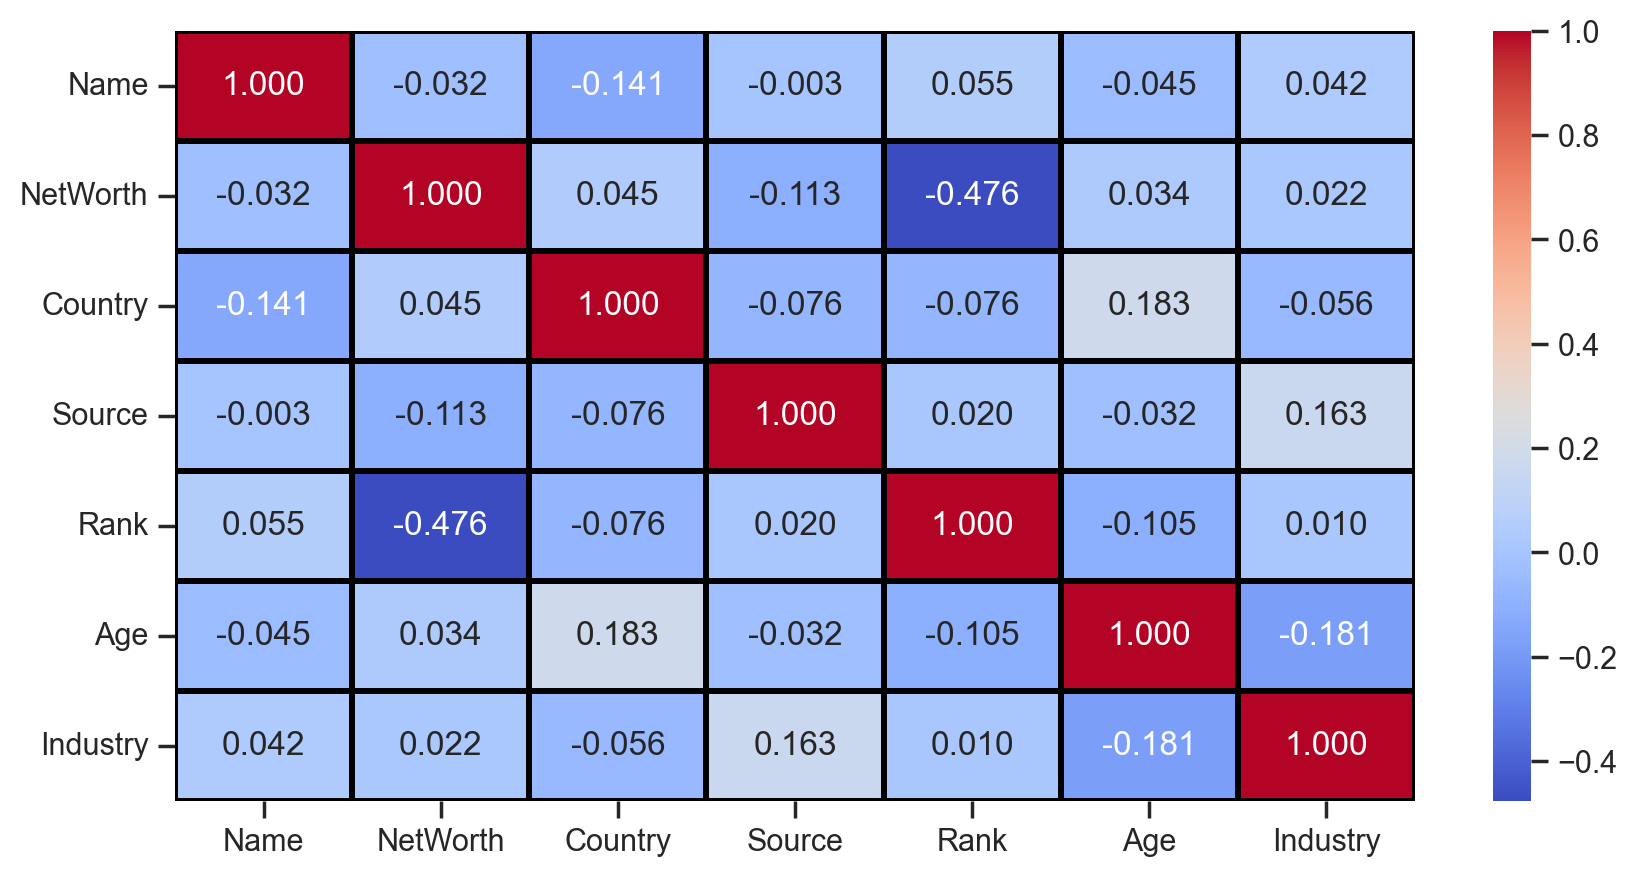

In [21]:
ig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_fix.corr(method='pearson'), ax=ax, annot=True, fmt='.3f', cmap= 'coolwarm', linewidths=2, linecolor='black')

#### Предсказание целевого признака
Предскажем значение целевого признака Rank.

## Обучающая и тестовая выборка

In [22]:
X = data_fix.drop(columns='Rank')
Y = data_fix['Rank']

In [23]:
# Входные данные
X.head()

,Name,NetWorth,Country,Source,Age,Industry
0,1015,177.0,66,6,57.0,16
1,598,151.0,66,143,49.0,0
2,221,150.0,16,86,72.0,4
3,238,124.0,66,96,65.0,16
4,1521,97.0,66,48,36.0,16


In [24]:
# Выходные данные
Y.head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

In [25]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2022, test_size = 0.1)

In [26]:
# Входные параметры обучающей выборки
X_train.head()

,Name,NetWorth,Country,Source,Age,Industry
518,406,5.5,32,337,63.0,8
2521,2656,1.2,8,267,56.0,10
425,2060,6.3,8,637,58.0,2
661,793,4.4,42,412,27.0,6
2722,1147,1.0,44,710,75.0,2


In [27]:
# Входные параметры тестовой выборки
X_test.head()

,Name,NetWorth,Country,Source,Age,Industry
10,86,77.0,55,158,85.0,4
1109,2538,2.9,8,193,50.0,0
2483,1609,1.2,66,786,50.0,16
1160,1953,2.8,18,313,80.0,4
527,821,5.4,66,166,79.0,6


In [28]:
# Выходные парметры обучающей выборки
Y_train.head()

518      502
2521    2378
425      421
661      655
2722    2674
Name: Rank, dtype: int64

In [29]:
# Выходные параметры тестовой выборки
Y_test.head()

10        11
1109    1064
2483    2378
1160    1111
527      520
Name: Rank, dtype: int64

## SVM

In [30]:
from sklearn.svm import SVR , LinearSVR
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot: xlabel='NetWorth', ylabel='Rank'>

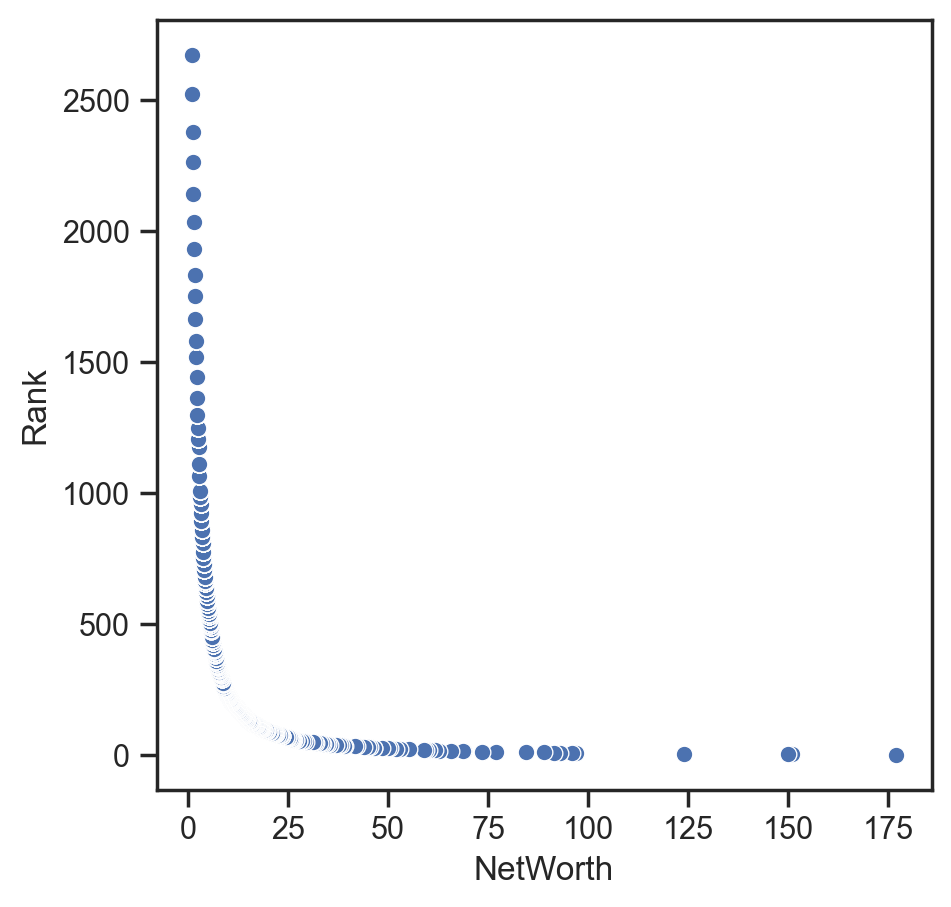

In [31]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=X['NetWorth'], y=Y)

In [32]:
svr_1 = SVR()
svr_1.fit(X_train, Y_train)

SVR()

In [33]:
Y_pred_1 = svr_1.predict(X_test)

In [34]:
# Проверка результата на 2 метриках
mean_absolute_error(Y_test, Y_pred_1), mean_squared_error(Y_test, Y_pred_1)

(638.7595466201764, 556783.494151921)

## Случайный лес

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [36]:
# Обучим регрессор на 4 деревьях
tree1 = RandomForestRegressor(n_estimators=4, oob_score=True, random_state=2022)
tree1.fit(X, Y)

C:\Users\Артемий\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=4, oob_score=True, random_state=2022)

In [37]:
# Out-of-bag error, возвращаемый регрессором
tree1.oob_score_, 1-tree1.oob_score_

(0.34744468408282236, 0.6525553159171776)

## Результат

In [40]:
regressor = RandomForestRegressor(n_estimators=4, random_state=2022)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [41]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.1623134328358209
Mean Squared Error: 0.34328358208955223
Root Mean Squared Error: 0.5859040724295678


Как видно, случайный лес показало намного более лучшие результаты, чем линейная регрессия. Основная причина в отсутствии масштабировавния данных (в обоих случаях).